## Imports

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dems = pd.read_csv('../datasets/dem_candidates.csv')

## Data Cleaning

In [6]:
dems = dems.rename(columns={'Warren Endorsed? ': 'Warren Endorsed?', 'Guns Sense Candidate?': 'Gun Sense Candidate?'})
endorsement_cols = dems.columns[pd.Series(dems.columns).str.contains('Endorsed')].values
endorsement_cols = np.append(endorsement_cols, 'Gun Sense Candidate?')
endorsement_cols = np.append(endorsement_cols, 'Party Support?')

dems[endorsement_cols] = dems[endorsement_cols].replace({'No': 0, 'Yes': 1})
dems['Total Endorsements'] = dems[endorsement_cols].sum(axis=1)
dems['Endorsed'] = (dems['Total Endorsements'] > 0).astype(int)
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


## Numerical Visualization 1: Number of Endorsements and Primary Success

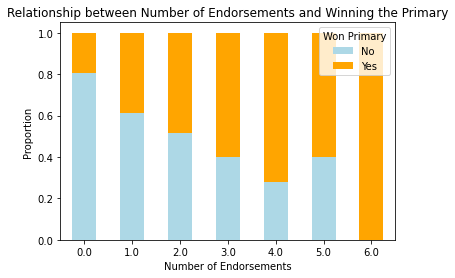

In [7]:
prop_df = dems.groupby(['Total Endorsements', 'Won Primary']).size().unstack(fill_value=0)
prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)

prop_df.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title('Relationship between Number of Endorsements and Winning the Primary')
plt.xlabel('Number of Endorsements')
plt.ylabel('Proportion')
plt.legend(title='Won Primary', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

plt.show();

When counting the "number of endorsements," we included `'Emily Endorsed?'`, `'Biden Endorsed?'`, `'Warren Endorsed?'`, `'Sanders Endorsed?'`, `'Our Revolution Endorsed?'`, `'Justice Dems Endorsed?'`, `'PCCC Endorsed?'`, `'Indivisible Endorsed?'`, `'WFP Endorsed?'`, `'VoteVets Endorsed?'`, `'Gun Sense Candidate?'`, and `'Party Support?'`. We opted to exclude `No Labels Support?` because, according to the dataset description, this feature tracked whether or not a candidate received financial support from a No Labels-affiliated group. We also excluded `Obama Alum?` because it is unclear whether that had the same weight as an explicit endorsement from a political candidate, party, or organization.

From this bar plot, we observe that the proportion of candidates who won their primary race generally increases with the number of endorsements received. Beyond this, we would like to explore whether different endorsements carried different weights. For example, do endorsements from high-profile Democratic presidential candidates—namely, Joe Biden, Bernie Sanders, and Elizabeth Warren—have a greater effect on a candidate's performance compared to endorsements from political organizations and PACs? Alternatively, does the impact of each endorsement change based on the political lean of the district? For example, would an endorsement from Sanders or Warren have a larger impact than an endorsement from Biden in a more left-leaning district?

This visualization is relevant to our second research question, where we aim to explore whether there exists a causal effect of endorsements on primary success. Although this visualization alone is not enough establish causality, it reveals that an association does seem to exist between receiving more endorsements and succeeding in the primary. Therefore, we see that the political endorsement question is worthy of further investigation.